In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [20]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8691 - loss: 0.4248 - val_accuracy: 0.9847 - val_loss: 0.0467
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9849 - loss: 0.0478 - val_accuracy: 0.9904 - val_loss: 0.0289
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.9891 - val_loss: 0.0359
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9897 - val_loss: 0.0330
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9931 - loss: 0.0203 - val_accuracy: 0.9900 - val_loss: 0.0353
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9948 - loss: 0.0169 - val_accuracy: 0.9905 - val_loss: 0.0297
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9953 - loss: 0.0136 - val_accuracy: 0.9907 - val_loss: 0.0340
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0675
Accuracy: 0.9879999756813049


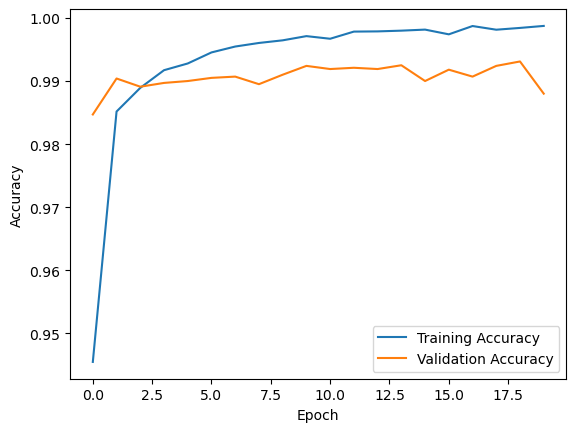

In [26]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()